In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\ahmed\Downloads\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.shape

(768, 9)

In [7]:
df.duplicated().sum()

0

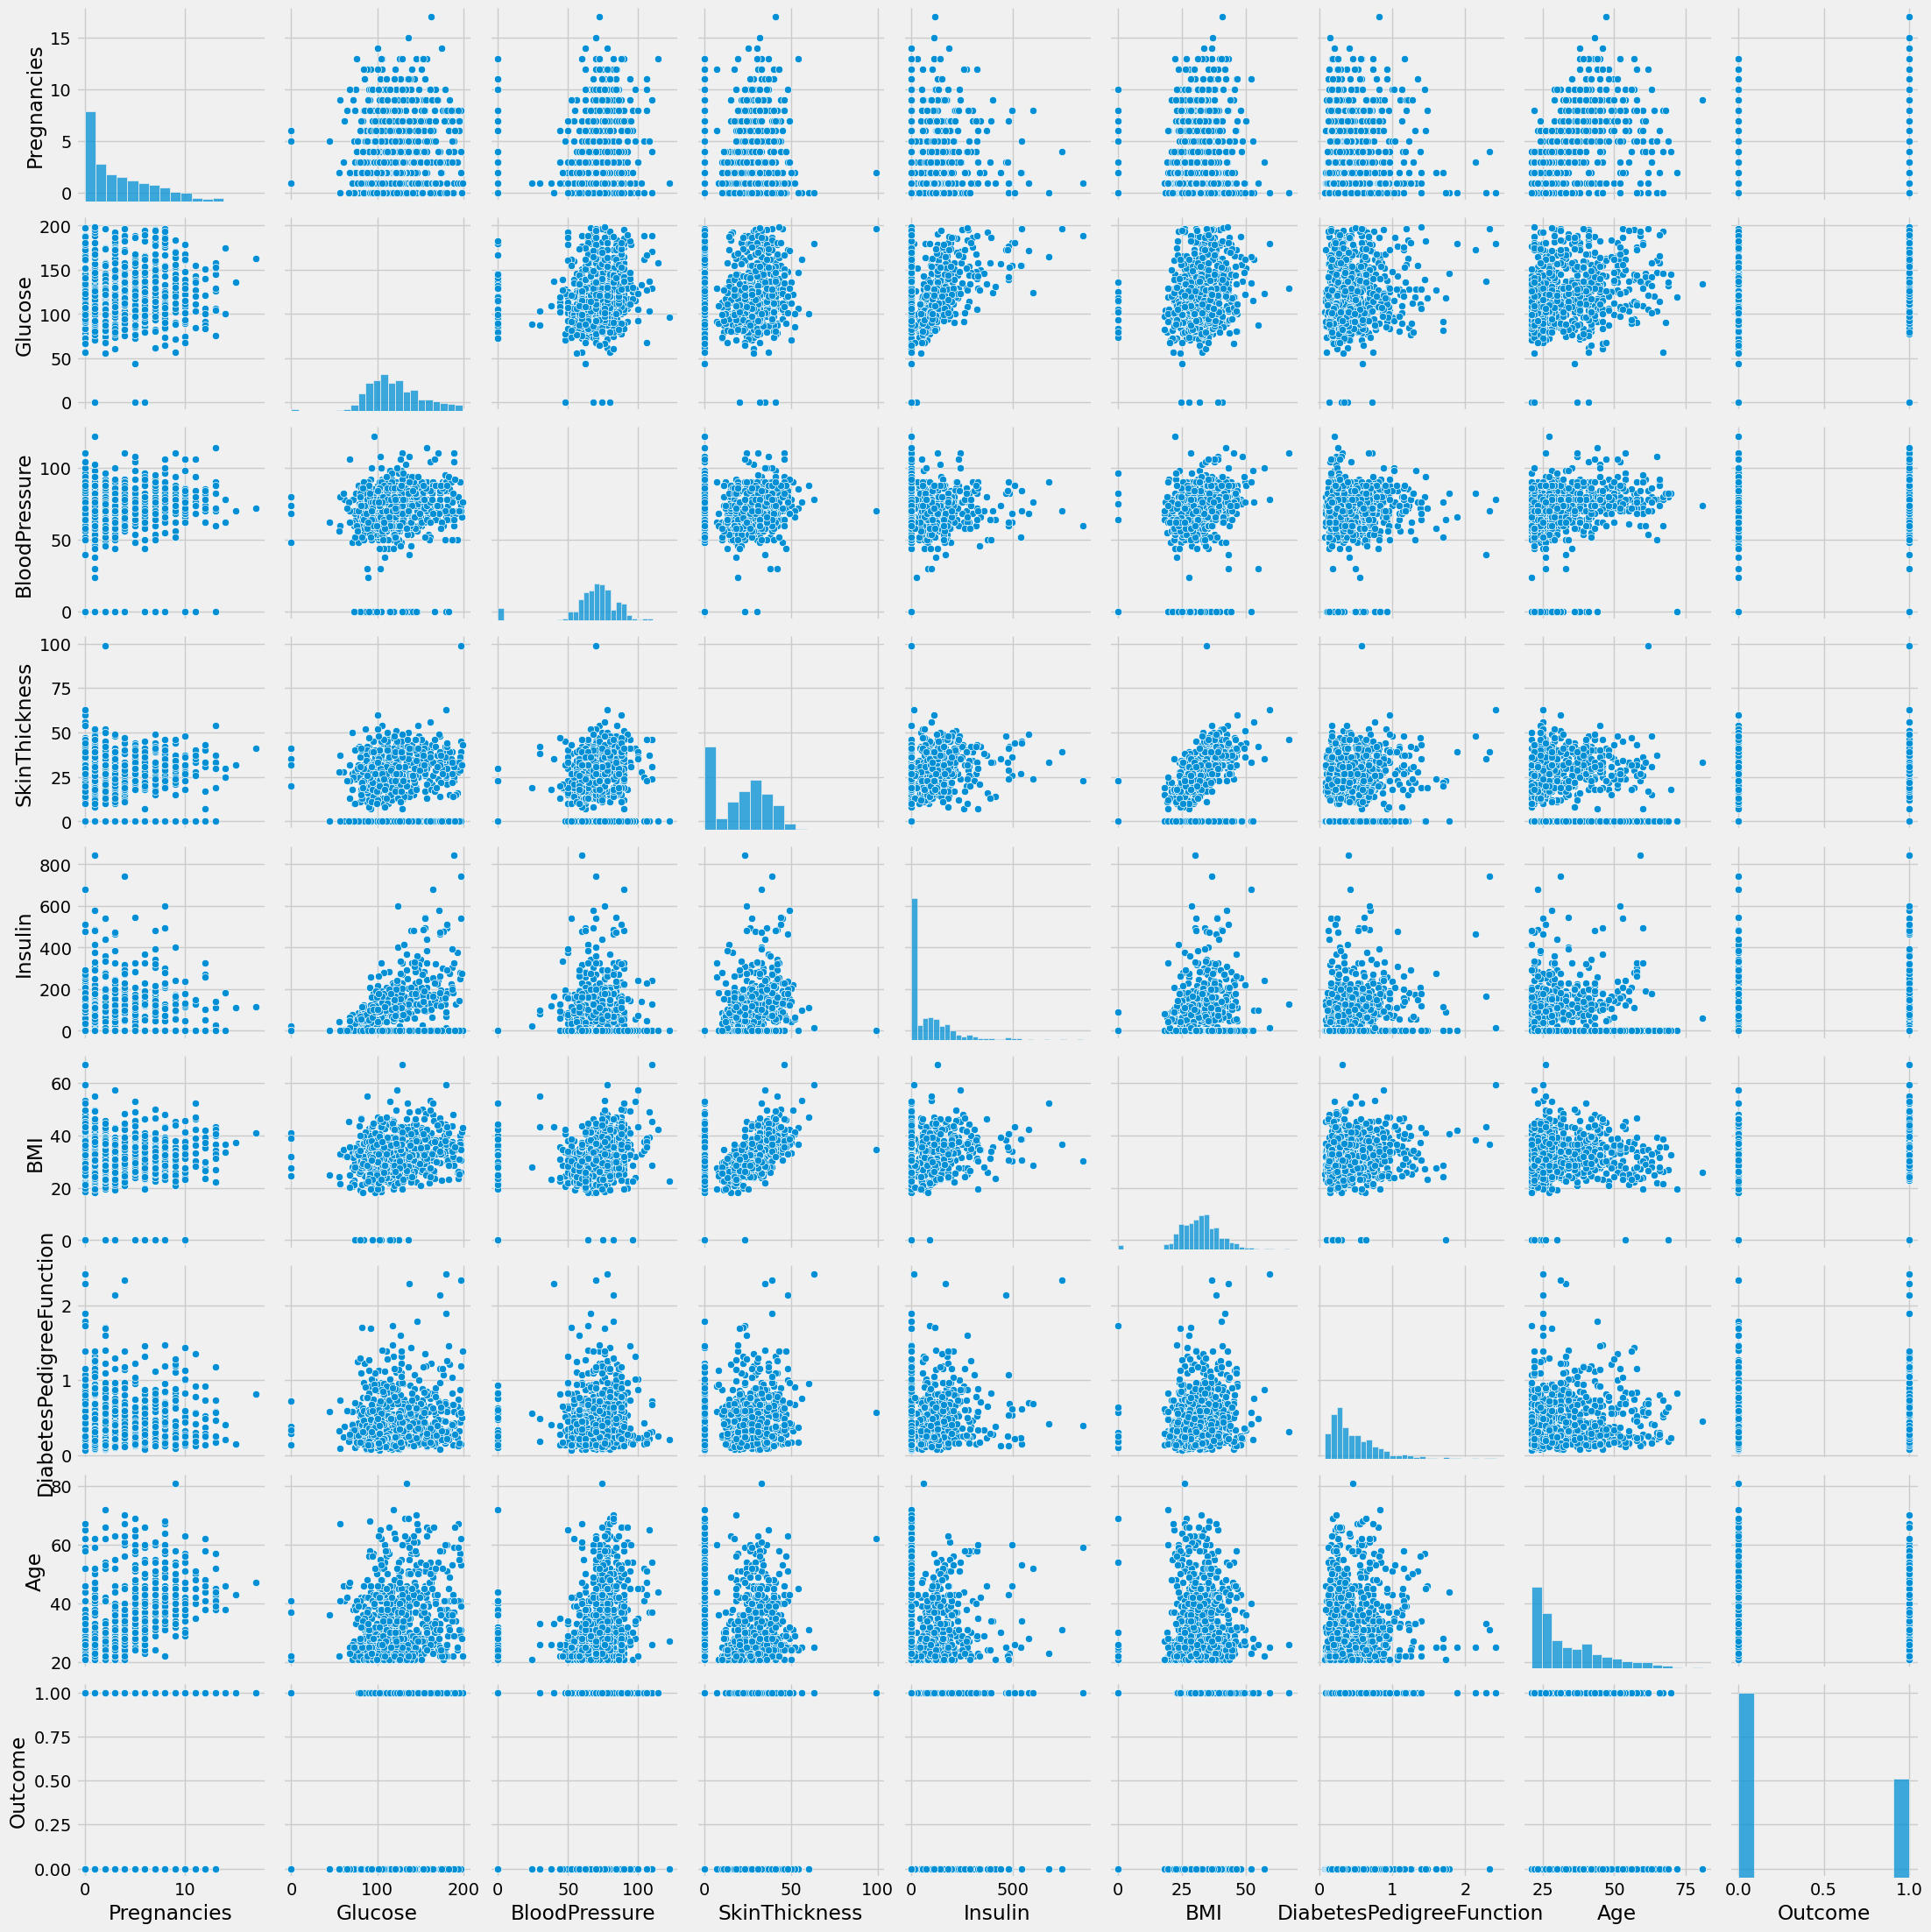

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

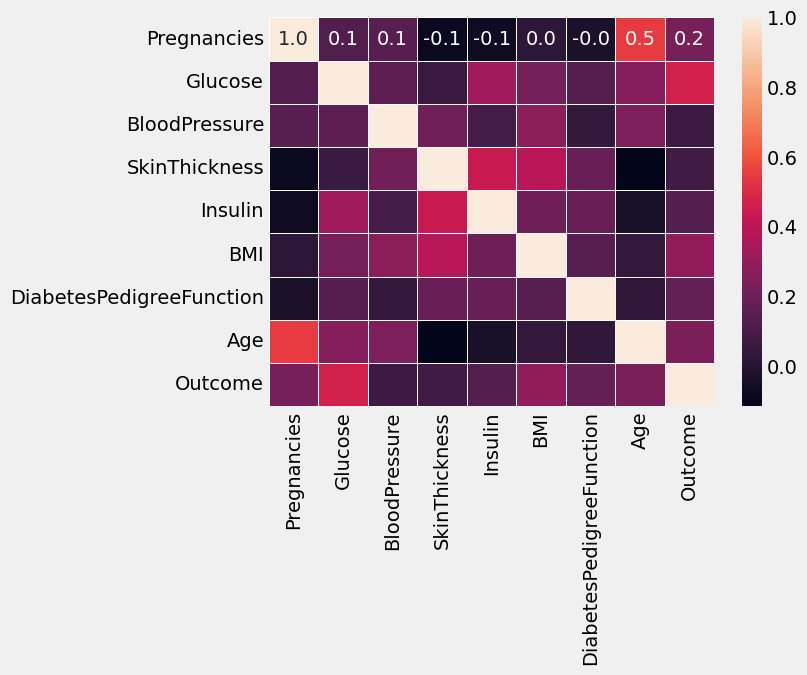

In [10]:
sns.heatmap(df.corr(),annot=True,fmt= '0.1f',linewidth=.5)

<Axes: xlabel='Outcome', ylabel='count'>

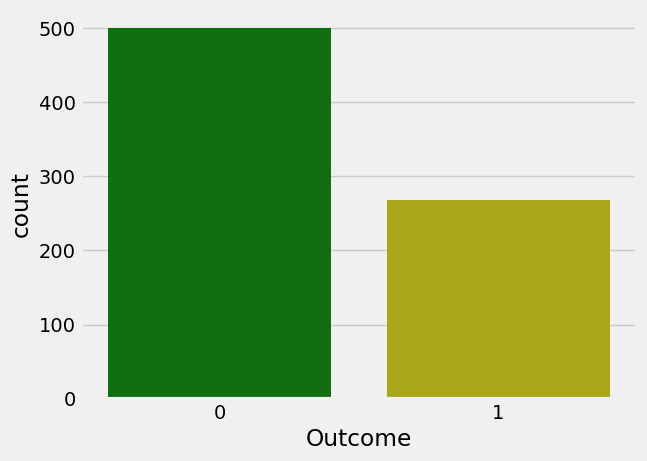

In [11]:
sns.countplot(x='Outcome', data= df, palette = ['g','y'])

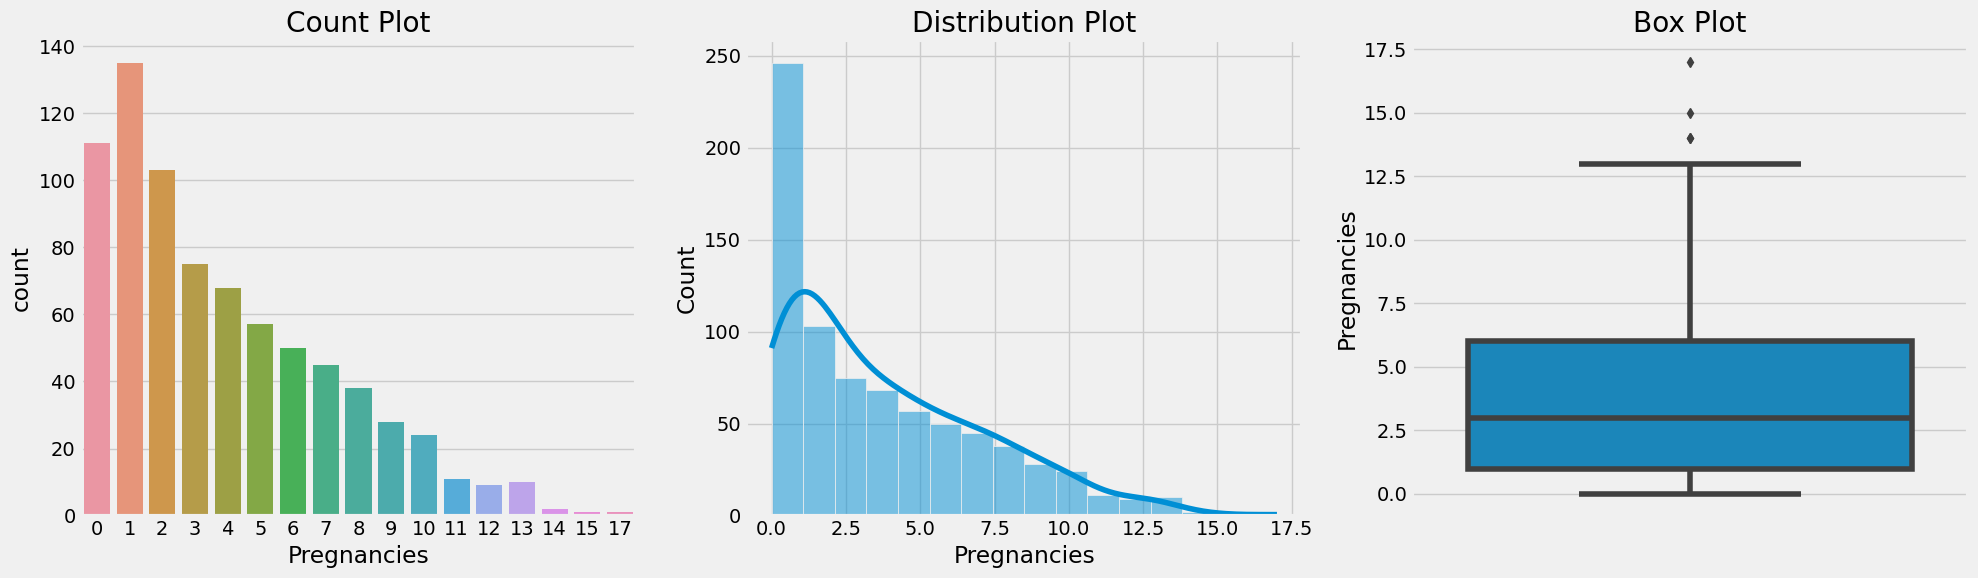

In [12]:
plt.figure(figsize=(20,6))

plt.subplot(1, 3, 1)
plt.title('Count Plot')
sns.countplot(x='Pregnancies', data=df)

plt.subplot(1, 3, 2)
plt.title('Distribution Plot')
sns.histplot(df['Pregnancies'], kde=True)

plt.subplot(1, 3, 3)
plt.title('Box Plot')
sns.boxplot(y=df['Pregnancies'])

plt.tight_layout()
plt.show()

<Axes: >

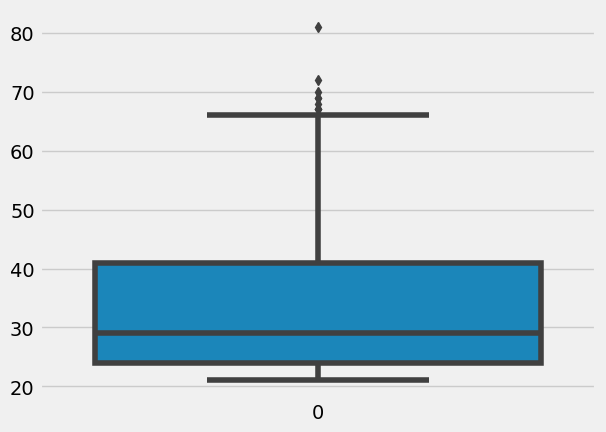

In [13]:
sns.boxplot(df['Age'])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [15]:
x = df.drop('Outcome' ,axis=1)
y = df['Outcome']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =.2, random_state = 42 )

In [17]:
lg = LogisticRegression()

In [18]:
lg.fit(x_train, y_train)

LogisticRegression()

In [19]:
pred= lg.predict(x_test)

In [20]:
accuracy_score(pred, y_test)

0.7402597402597403

In [21]:
recall_score(pred, y_test)

0.631578947368421

In [22]:
f1_score(pred, y_test)

0.6428571428571428

In [23]:
confusion_matrix(pred, y_test)

array([[78, 19],
       [21, 36]], dtype=int64)

In [24]:
accuracy = accuracy_score(pred, y_test)
recall = recall_score(pred, y_test)
f1 = f1_score(pred, y_test)
confusion_table = confusion_matrix(pred, y_test)

In [25]:
print('Accuracy is:', accuracy)
print('Recall is:', recall)
print('F1 Score is:', f1)
print('Confusion Matrix is:\n', confusion_table)

Accuracy is: 0.7402597402597403
Recall is: 0.631578947368421
F1 Score is: 0.6428571428571428
Confusion Matrix is:
 [[78 19]
 [21 36]]


In [59]:
model1 = LogisticRegression()
model2 = SVC()
model3 = RandomForestClassifier(n_estimators=200, class_weight= 'balanced')
model4 = GradientBoostingClassifier(n_estimators=1000)

In [60]:
columns=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

In [61]:
def cal(model):
    model.fit(x_train, y_train)
    pred= model.predict(x_test)
    accuracy = accuracy_score(pred, y_test)
    recall = recall_score(pred, y_test)
    f1 = f1_score(pred, y_test)
    confusion_table = confusion_matrix(pred, y_test)
      
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    
    print(model)
    print('Accuracy is:', accuracy)
    print('Recall is:', recall)
    print('F1 Score is:', f1)
    print('Confusion Matrix is:\n', confusion_table)


In [62]:
cal(model1)

LogisticRegression()
Accuracy is: 0.7402597402597403
Recall is: 0.631578947368421
F1 Score is: 0.6428571428571428
Confusion Matrix is:
 [[78 19]
 [21 36]]


In [63]:
cal(model2)

SVC()
Accuracy is: 0.7662337662337663
Recall is: 0.7209302325581395
F1 Score is: 0.6326530612244898
Confusion Matrix is:
 [[87 24]
 [12 31]]


In [64]:
cal(model3)

RandomForestClassifier(class_weight='balanced', n_estimators=200)
Accuracy is: 0.7337662337662337
Recall is: 0.64
F1 Score is: 0.6095238095238096
Confusion Matrix is:
 [[81 23]
 [18 32]]


In [65]:
cal(model4)

GradientBoostingClassifier(n_estimators=1000)
Accuracy is: 0.7337662337662337
Recall is: 0.609375
F1 Score is: 0.6554621848739497
Confusion Matrix is:
 [[74 16]
 [25 39]]


In [66]:
Final_Results= pd.DataFrame({'Algorithm':columns, 'Accuracies':result1, 'Recalls':result2, 'Fscore':result3})

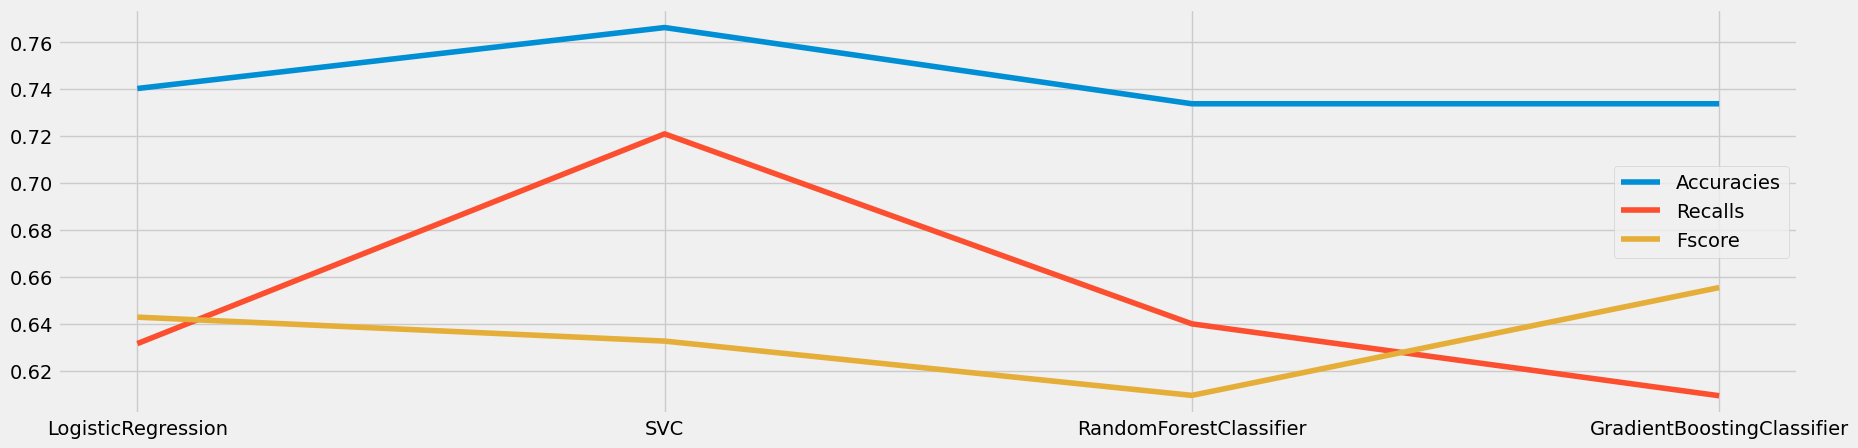

In [67]:
fig,ax= plt.subplots(figsize=(20,5))

plt.plot(Final_Results.Algorithm, result1, label="Accuracies")
plt.plot(Final_Results.Algorithm, result2, label="Recalls")
plt.plot(Final_Results.Algorithm, result3, label="Fscore")

plt.legend()

plt.show()